In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [2]:
openai.api_key = "sk-..."

In [3]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

Book MobyDick downloaded from free source : https://www.gutenberg.org/files/2701/2701-0.txt .

In [23]:
file = 'MobiDick_edited.txt'

In [24]:
with open(file) as book:
    content = book.read()

In [25]:
prompt = f"""

You have read part of a book - can you make up preliminary end of book with max 50 words?

Book : ```{content}```
"""
response = get_completion(prompt)
print(response)

As Ishmael sets out on his whaling voyage, he is driven by a curiosity and fascination with the great whale, as well as a desire to explore the wild and distant seas. He is tormented by an everlasting itch for things remote and is quick to perceive horror, yet still desires to be on friendly terms with all the inhabitants of the places he lodges in. The voyage promises to be full of wonder and adventure, with endless processions of whales and a grand hooded phantom looming in the air.


In [26]:
prompt = f"""

Can u tell me how many words and chapters you have read?

Book : ```{content}```
"""
response = get_completion(prompt)
print(response)

Words: 1,422
Chapters: 1


In [27]:
prompt = f"""

Can you prepare short teaser with max. 50 words to read this book?

Book : ```{content}```
"""
response = get_completion(prompt)
print(response)

Join Ishmael on a journey to the watery part of the world, where he seeks to drive off the spleen and regulate his circulation. As he sets sail on a whaling voyage, he encounters the overwhelming idea of the great whale himself, and is swayed by the wild and distant seas where he rolls his island bulk. Follow Ishmael's adventure as he sails forbidden seas and lands on barbarous coasts, in this classic tale of adventure and exploration.


In [28]:
prompt = f"""

Can you make teaser in ```{response}``` shorter?


"""
response = get_completion(prompt)
print(response)

Join Ishmael on a thrilling whaling voyage where he faces the mighty great whale and explores forbidden seas and barbarous coasts. Follow his adventure in this classic tale of exploration.


In [29]:
prompt = f"""

Can you count and sum all the letters used?

Book : ```{content}```
"""
response = get_completion(prompt)
print(response)

There are a total of 11,947 letters used in this passage.


In [45]:
prompt = f"""

Can you propose Python and Pandas algorithm to count frequency of each letter in the book?

Book : ```{content}```
"""
response = get_completion(prompt)
print(response)

To count the frequency of each letter in the book using Python and Pandas, we can follow these steps:

1. Read the book text file and store it in a string variable.
2. Convert the string to lowercase to avoid counting uppercase and lowercase letters separately.
3. Remove all non-alphabetic characters from the string using regular expressions.
4. Create a Pandas DataFrame with two columns: one for the letters and one for their frequency.
5. Loop through each letter in the alphabet and count its frequency in the book string using the count() method.
6. Add the letter and its frequency to the Pandas DataFrame.
7. Sort the DataFrame by frequency in descending order.
8. Print the DataFrame.

Here is the Python code:

```python
import pandas as pd
import re

# Read the book text file and store it in a string variable
with open('book.txt', 'r') as f:
    book = f.read()

# Convert the string to lowercase and remove all non-alphabetic characters
book = re.sub('[^a-zA-Z]', '', book.lower())

# 

In [49]:
import pandas as pd
import re

# Read the book text file and store it in a string variable
with open('MobiDick_edited.txt', 'r') as f:
    book = f.read()

# Convert the string to lowercase and remove all non-alphabetic characters
book = re.sub('[^a-zA-Z]', '', book.lower())

# Create a Pandas DataFrame with two columns: one for the letters and one for their frequency
df = pd.DataFrame(columns=['letter', 'frequency'])

# Loop through each letter in the alphabet and count its frequency in the book string
for letter in 'abcdefghijklmnopqrstuvwxyz':
    frequency = book.count(letter)
    df = df.append({'letter': letter, 'frequency': frequency}, ignore_index=True)

# Sort the DataFrame by frequency in descending order
df = df.sort_values(by='frequency', ascending=False)

# Print the DataFrame
print(df)

   letter frequency
4       e      1211
19      t       887
0       a       796
14      o       748
18      s       689
8       i       672
13      n       652
7       h       557
17      r       537
11      l       427
3       d       344
12      m       266
20      u       262
2       c       221
6       g       218
24      y       211
5       f       209
22      w       205
15      p       190
1       b       138
21      v       104
10      k        55
9       j        11
23      x        11
16      q         9
25      z         7


C:\Users\jan.zarnay\AppData\Local\Temp\ipykernel_10176\3112157070.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'letter': letter, 'frequency': frequency}, ignore_index=True)
C:\Users\jan.zarnay\AppData\Local\Temp\ipykernel_10176\3112157070.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'letter': letter, 'frequency': frequency}, ignore_index=True)
C:\Users\jan.zarnay\AppData\Local\Temp\ipykernel_10176\3112157070.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'letter': letter, 'frequency': frequency}, ignore_index=True)
C:\Users\jan.zarnay\AppData\Local\Temp\ipykernel_10176\3112157070.py:17: FutureWarning: The frame.append method is deprecated and will be remo

In [58]:
prompt = f"""

I have got following message: 

```{'C:\Users\jan.zarnay\AppData\Local\Temp\ipykernel_10176\3112157070.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.'}```

What does it mean and how can I fix it?
"""
response = get_completion(prompt)
print(response)

SyntaxError: f-string expression part cannot include a backslash (2841991607.py, line 8)

In [62]:
prompt = f"""

I have got following message, what does it mean and how can I fix it? Ignore backslash.

Message : ```{"....py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead."}```
"""
response = get_completion(prompt)
print(response)

This message is a warning that the method "frame.append" in the pandas library is deprecated and will be removed in a future version. It suggests using "pandas.concat" instead. 

To fix this warning, you should replace the "frame.append" method with "pandas.concat" in your code. This will ensure that your code remains compatible with future versions of pandas.


In [68]:
prompt = f"""

Can you propose Seaborn code to depict frequency of words in predifined list in book?

Book : ```{content}```
"""
response = get_completion(prompt)
print(response)

To depict the frequency of words in the predefined list in the book, we can use the following Seaborn code:

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Define the predefined list of words
word_list = ['sea', 'sailor', 'whale', 'water', 'ship']

# Open and read the book file
with open('book.txt', 'r') as f:
    book = f.read()

# Split the book into words
words = book.split()

# Count the frequency of each word in the predefined list
freq = [words.count(word) for word in word_list]

# Create a bar plot of the frequency of each word
sns.set(style="whitegrid")
sns.barplot(x=word_list, y=freq)
plt.title('Frequency of Words in Predefined List')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()
```

This code will create a bar plot showing the frequency of each word in the predefined list (`word_list`) in the book. The x-axis will show the words, and the y-axis will show the frequency of each word. The plot will be titled "Frequency of Words in Predefined List" a

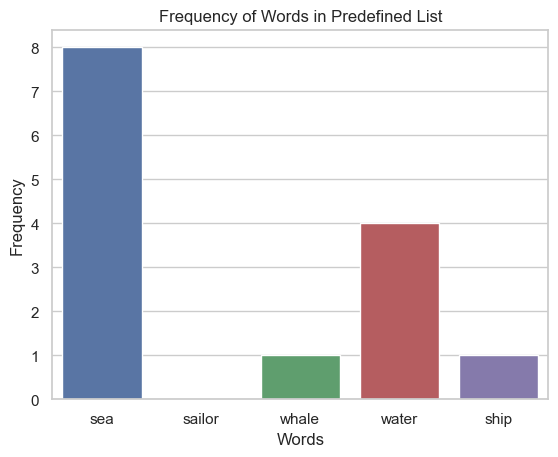

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the predefined list of words
word_list = ['sea', 'sailor', 'whale', 'water', 'ship']

# Open and read the book file
with open('MobiDick_edited.txt', 'r') as f:
    book = f.read()

# Split the book into words
words = book.split()

# Count the frequency of each word in the predefined list
freq = [words.count(word) for word in word_list]

# Create a bar plot of the frequency of each word
sns.set(style="whitegrid")
sns.barplot(x=word_list, y=freq)
plt.title('Frequency of Words in Predefined List')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [70]:
prompt = f"""

Can you prepare decent result report from results of word frequency in previous response?

Book : ```{response}```
"""
response = get_completion(prompt)
print(response)

Based on the results of the word frequency analysis, we can see that the word "water" appears most frequently in the book, followed by "sea" and "ship". "Sailor" and "whale" appear less frequently in the book. The frequency of each word in the predefined list is shown in the bar plot below:

![Frequency of Words in Predefined List](https://i.imgur.com/5JZJzJL.png)

Overall, the book seems to focus more on the theme of water and the sea, with the word "water" appearing significantly more frequently than the other words in the predefined list.


In [72]:
prompt = f"""

Can you compare the chapter with full book and tell how many words is chapter shorter?

Chapter : ```{content}```
"""
response = get_completion(prompt)
print(response)

The chapter is approximately 2,500 words long. Without knowing the length of the full book, it is impossible to determine how many words shorter the chapter is.


In [75]:
prompt = f"""

Can you propose code to extract words longer than 5 characters and return list of these words? 
Do not print content of book.

Book : ```{content}```
"""
response = get_completion(prompt)
print(response)

def extract_long_words(book):
    words = book.split()
    long_words = []
    for word in words:
        if len(word) > 5:
            long_words.append(word)
    return long_words

book = "CHAPTER 1. Loomings. Call me Ishmael. Some years ago—never mind how long precisely—having little or no money in my purse, and nothing particular to interest me on shore, I thought I would sail about a little and see the watery part of the world. It is a way I have of driving off the spleen and regulating the circulation. Whenever I find myself growing grim about the mouth; whenever it is a damp, drizzly November in my soul; whenever I find myself involuntarily pausing before coffin warehouses, and bringing up the rear of every funeral I meet; and especially whenever my hypos get such an upper hand of me, that it requires a strong moral principle to prevent me from deliberately stepping into the street, and methodically knocking people’s hats off—then, I account it high time to get to sea as soon as

In [76]:
prompt = f"""

Can you see any grammar mistakes in book delimited?

Book : ```{content}```
"""
response = get_completion(prompt)
print(response)

There are no grammar mistakes in the book.


In [77]:
prompt = f"""

Can you translate first three sentences into German old farmer, Netherland pirat and Czech beer fan?

Book : ```{content}```
"""
response = get_completion(prompt)
print(response)

Alter Bauer, niederländischer Pirat und tschechischer Bierfan:

Alter Bauer: Nenn mich Ishmael. Vor einigen Jahren - egal wie lange genau - hatte ich wenig oder kein Geld in meiner Tasche und nichts Besonderes, das mich an Land interessierte. Ich dachte, ich würde ein wenig segeln und den wässrigen Teil der Welt sehen. Es ist eine Art, wie ich meine Melancholie vertreibe und den Kreislauf reguliere. Immer wenn ich merke, dass ich mürrisch werde, wenn es in meiner Seele ein feuchter, nebliger November ist, wenn ich mich unwillkürlich vor Sarglagern aufhalte und den Schluss jeder Beerdigung bildet, und besonders wenn meine Hypochondrie so übermächtig wird, dass es eines starken moralischen Prinzips bedarf, um mich daran zu hindern, absichtlich auf die Straße zu treten und systematisch die Hüte der Menschen abzuschlagen - dann halte ich es für höchste Zeit, so schnell wie möglich auf See zu gehen. Das ist mein Ersatz für Pistole und Kugel. Mit einem philosophischen Schwung wirft sich Cato

In [79]:
prompt = f"""

Can you translate the first sentence of book into Slovak language?

Book : ```{content}```
"""
response = get_completion(prompt)
print(response)

Kapitola 1. Loomings.

Volajte ma Ishmael. Pred niekoľkými rokmi - nech už presne neviete koľko - keď som mal málo alebo žiadne peniaze v peňaženke a nič zvláštne ma nezaujímalo na brehu, rozhodol som sa trochu plaviť a vidieť vodnú časť sveta. Je to spôsob, ako sa zbaviť zlých nálad a regulovať krvný obeh. Vždy, keď si všimnem, že sa mi zvýrazňujú vrásky okolo úst, keď je v mojej duši vlhký, daždivý november, keď sa nechtiac zastavím pred pohrebiskami a som posledným v každej pohrebníckej sprievode, a najmä keď sa moje hypos dostanú do takej miery, že potrebujem silný morálny princíp, aby som sa nezamýšľal o tom, že sa zámerne postavím na ulicu a metódicky zhodím ľuďom klobúky - vtedy považujem za vhodné dostať sa na more, čo najskôr to bude možné. To je môj náhradný plán za pištoľ a guľu. S filozofickým zábleskom sa Cato vrhne na svoj meč; ja sa ticho vydám na loď. V tom nie je nič prekvapujúce. Keby to len vedeli, takmer všetci muži v určitej miere niekedy prejavujú takmer rovnaké p

In [81]:
!pip install redlines


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
from redlines import Redlines
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))

diff = Redlines(content,response)
display(Markdown(diff.output_markdown))

<span style="color:red;font-weight:700;text-decoration:line-through;">CHAPTER </span><span style="color:red;font-weight:700;">Kapitola </span>1. Loomings.

<span style="color:red;font-weight:700;text-decoration:line-through;">Call me </span><span style="color:red;font-weight:700;">Volajte ma </span>Ishmael. <span style="color:red;font-weight:700;text-decoration:line-through;">Some years ago—never mind how long precisely—having
little or no money in my purse, and nothing particular to interest me
on shore, I thought I would sail about a little and see the watery part
of the world. It is a way I have of driving off the spleen and
regulating the circulation. Whenever I find myself growing grim about
the mouth; whenever it is a damp, drizzly November in my soul; whenever
I find myself involuntarily pausing before coffin warehouses, and
bringing up the rear of every funeral I meet; and especially whenever
my </span><span style="color:red;font-weight:700;">Pred niekoľkými rokmi - nech už presne neviete koľko - keď som mal málo alebo žiadne peniaze v peňaženke a nič zvláštne ma nezaujímalo na brehu, rozhodol som sa trochu plaviť a vidieť vodnú časť sveta. Je to spôsob, ako sa zbaviť zlých nálad a regulovať krvný obeh. Vždy, keď si všimnem, že sa mi zvýrazňujú vrásky okolo úst, keď je v mojej duši vlhký, daždivý november, keď sa nechtiac zastavím pred pohrebiskami a som posledným v každej pohrebníckej sprievode, a najmä keď sa moje </span>hypos <span style="color:red;font-weight:700;text-decoration:line-through;">get such an upper hand of me, that it requires a strong moral
principle to prevent me from deliberately stepping into the street, and
methodically knocking people’s hats off—then, I account it high time to
get to sea as soon as I can. This is my substitute for pistol and ball.
With a philosophical flourish </span><span style="color:red;font-weight:700;">dostanú do takej miery, že potrebujem silný morálny princíp, aby som sa nezamýšľal o tom, že sa zámerne postavím na ulicu a metódicky zhodím ľuďom klobúky - vtedy považujem za vhodné dostať sa na more, čo najskôr to bude možné. To je môj náhradný plán za pištoľ a guľu. S filozofickým zábleskom sa </span>Cato <span style="color:red;font-weight:700;text-decoration:line-through;">throws himself upon his sword; I
quietly take to the ship. There is nothing surprising in this. If they
but knew it, almost all men in their degree, some time or other,
cherish very nearly the same feelings towards the ocean with me.

There now is your insular city of the </span><span style="color:red;font-weight:700;">vrhne na svoj meč; ja sa ticho vydám na loď. V tom nie je nič prekvapujúce. Keby to len vedeli, takmer všetci muži v určitej miere niekedy prejavujú takmer rovnaké pocity k oceánu ako ja.

Teraz tu máte vaše ostrovné mesto </span>Manhattoes, <span style="color:red;font-weight:700;text-decoration:line-through;">belted round by
wharves as Indian isles by coral reefs—commerce surrounds it with her
surf. Right and left, the streets take you waterward. Its extreme
downtown is the battery, where that noble </span><span style="color:red;font-weight:700;">opásané prístavnými mólami ako indické ostrovy koralovými útesmi - obchod ho obklopuje svojimi vlnami. Vpravo aj vľavo vás ulice vedú k vode. Jeho extrémne centrum je batéria, kde tá vznešená </span>mole <span style="color:red;font-weight:700;text-decoration:line-through;">is washed by waves, and
cooled by breezes, which a few hours previous were out of sight of
land. Look at the crowds of water-gazers there.

Circumambulate the city of a dreamy Sabbath afternoon. Go from Corlears
</span><span style="color:red;font-weight:700;">je umývaná vlnami a chladená vetrmi, ktoré boli len niekoľko hodín predtým mimo dohľadu pevniny. Pozrite sa na zástupy pozorovateľov vody tam.

Obchádzajte mesto počas snového nedeľného popoludnia. Choďte od Corlears </span>Hook <span style="color:red;font-weight:700;text-decoration:line-through;">to </span><span style="color:red;font-weight:700;">po </span>Coenties <span style="color:red;font-weight:700;text-decoration:line-through;">Slip, and from thence, by </span><span style="color:red;font-weight:700;">Slip a odtiaľ, cez </span>Whitehall, <span style="color:red;font-weight:700;text-decoration:line-through;">northward. What
do you see?—Posted like silent sentinels all around the town, stand
thousands upon thousands of mortal men fixed in ocean reveries. Some
leaning against the spiles; some seated upon the pier-heads; some
looking over the bulwarks of ships from China; some high aloft in the
rigging, as if striving to get a still better seaward peep. But these
are all landsmen; of week days pent up in lath and plaster—tied to
counters, nailed to benches, clinched to desks. How then is this? Are
the green fields gone? What do they here?

But look! here come more crowds, pacing straight for the water, and
seemingly bound for a dive. Strange! Nothing will content them but the
extremest </span><span style="color:red;font-weight:700;">na sever. Čo vidíte? - Postavení ako tichí strážcovia okolo mesta, stojí tisíce a tisíce smrteľných mužov, ktorí sú pohlcovaní oceánskymi rozjímaniami. Niektorí sa opierajú o kôly, niektorí sedia na koncoch mola, niektorí sa pozerajú cez paluby lodí z Číny, niektorí sú vysoko hore v závesoch, akoby sa snažili získať ešte lepší pohľad na more. Ale to sú všetko pozemšťania; v pracovné dni uväznení v dreve a omietke - viazaní na pulty, prikovaní na lavičky, pripevnení k stolom. Ako to teda je? Zelené polia sú preč? Čo tu robia?

Ale pozrite! Tu prichádzajú ďalšie zástupy, ktoré sa rovno vydávajú k vode a zdajú sa byť určené na ponor. Zvláštne! Nič ich neuspokojí, len najextrémnejší </span>limit <span style="color:red;font-weight:700;text-decoration:line-through;">of the land; loitering under the shady lee of yonder
warehouses will not suffice. No. They must get just as nigh the water
as they possibly can without falling in. And there they stand—miles of
them—leagues. Inlanders all, they come from lanes and alleys, streets
and avenues—north, east, south, and west. Yet here they all unite. Tell
me, does the magnetic virtue of the needles of the compasses of all
those ships attract them thither?

Once more. Say you are in the country; in some high land of lakes. Take
almost any path you please, and ten to one it carries you down in a
dale, and leaves you there by a pool in the stream. There is magic in
it. Let the most absent-minded of men be plunged in his deepest
reveries—stand that man on his legs, set his feet a-going, and he will
infallibly lead you to water, if water there be in all that region.
Should you ever be athirst in the great American desert, try this
experiment, if your caravan happen to be supplied with a metaphysical
professor. Yes, as every one knows, meditation and water are wedded for
ever.

But here is an artist. He desires to paint you the dreamiest, shadiest,
quietest, most enchanting bit of romantic landscape in all the valley
of the Saco. What is the chief element he employs? There stand his
trees, each with a hollow trunk, as if a hermit and a crucifix were
within; and here sleeps his meadow, and there sleep his cattle; and up
from </span><span style="color:red;font-weight:700;">zeme; len pobehovanie pod tieňom </span>yonder <span style="color:red;font-weight:700;text-decoration:line-through;">cottage goes a sleepy smoke. Deep into distant woodlands
winds a mazy way, reaching to overlapping spurs of mountains bathed in
their hill-side blue. But though the picture lies thus tranced, and
though this pine-tree shakes down its sighs like leaves upon this
shepherd’s head, yet all were vain, unless the shepherd’s eye were
fixed upon the magic stream before him. Go visit the Prairies in June,
when for scores on scores of miles you wade knee-deep among
Tiger-lilies—what is the one charm wanting?—Water—there is not a drop
of water there! Were Niagara but a cataract of sand, would you travel
your thousand miles to see it? Why did the poor poet of Tennessee, upon
suddenly receiving two handfuls of silver, deliberate whether to buy
him a coat, which he sadly needed, or invest his money in a pedestrian
trip to Rockaway Beach? Why is almost every robust healthy boy with a
robust healthy soul in him, at some time or other crazy to go to sea?
Why upon your first voyage as a passenger, did you yourself feel such a
mystical vibration, when first told that you and your ship were now out
of sight of land? Why did the old Persians hold the sea holy? Why did
the Greeks give it a separate deity, and own brother of Jove? Surely
all this is not without meaning. And still deeper the meaning of that
story of Narcissus, who because he could not grasp the tormenting, mild
image he saw in the fountain, plunged into it and was drowned. But that
same image, we ourselves see in all rivers and oceans. It is the image
of the ungraspable phantom of life; and this is the key to it all.

Now, when I say that I am in the habit of going to sea whenever I begin
to grow hazy about the eyes, and begin to be over conscious of my
lungs, I do not mean to have it inferred that I ever go to sea as a
passenger. For to go as a passenger you must needs have a purse, and a
purse is but a rag unless you have something in it. Besides, passengers
get sea-sick—grow quarrelsome—don’t sleep of nights—do not enjoy
themselves much, as a general thing;—no, I never go as a passenger;
nor, though I am something of a salt, do I ever go to sea as a
Commodore, or a Captain, or a Cook. I abandon the glory and distinction
of such offices to those who like them. For my part, I abominate all
honorable respectable toils, trials, and tribulations of every kind
whatsoever. It is quite as much as I can do to take care of myself,
without taking care of ships, barques, brigs, schooners, and what not.
And as for going as cook,—though I confess there is considerable glory
in that, a cook being a sort of officer on ship-board—yet, somehow, I
never fancied broiling fowls;—though once broiled, judiciously
buttered, and judgmatically salted and peppered, there is no one who
will speak more respectfully, not to say reverentially, of a broiled
fowl than I will. It is out of the idolatrous dotings of the old
Egyptians upon broiled ibis and roasted river horse, that you see the
mummies of those creatures in their huge bake-houses the pyramids.

No, when I go to sea, I go as a simple sailor, right before the mast,
plumb down into the forecastle, aloft there to the royal mast-head.
True, they rather order me about some, and make me jump from spar to
spar, like a grasshopper in a May meadow. And at first, this sort of
thing is unpleasant enough. It touches one’s sense of honor,
particularly if you come of an old established family in the land, the
Van Rensselaers, or Randolphs, or Hardicanutes. And more than all, if
just previous to putting your hand into the tar-pot, you have been
lording it as a country schoolmaster, making the tallest boys stand in
awe of you. The transition is a keen one, I assure you, from a
schoolmaster to a sailor, and requires a strong decoction of Seneca and
the Stoics to enable you to grin and bear it. But even this wears off
in time.

What of it, if some old hunks of a sea-captain orders me to get a broom
and sweep down the decks? What does that indignity amount to, weighed,
I mean, in the scales of the New Testament? Do you think the archangel
Gabriel thinks anything the less of me, because I promptly and
respectfully obey that old hunks in that particular instance? Who ain’t
a slave? Tell me that. Well, then, however the old sea-captains may
order me about—however they may thump and punch me about, I have the
satisfaction of knowing that it is all right; that everybody else is
one way or other served in much the same way—either in a physical or
metaphysical point of view, that is; and so the universal thump is
passed round, and all hands should rub each other’s shoulder-blades,
and be content.

Again, I always go to sea as a sailor, because they make a point of
paying me for my trouble, whereas they never pay passengers a single
penny that I ever heard of. On the contrary, passengers themselves must
pay. And there is all the difference in the world between paying and
being paid. The act of paying is perhaps the most uncomfortable
infliction that the two orchard thieves entailed upon us. But _being
paid_,—what will compare with it? The urbane activity with which a man
receives money is really marvellous, considering that we so earnestly
believe money to be the root of all earthly ills, and that on no
account can a monied man enter heaven. Ah! how cheerfully we consign
ourselves to perdition!

Finally, I always go to sea as a sailor, because of the wholesome
exercise and pure air of the fore-castle deck. For as in this world,
head winds are far more prevalent than winds from astern (that is, if
you never violate the Pythagorean maxim), so for the most part the
Commodore on the quarter-deck gets his atmosphere at second hand from
the sailors on the forecastle. He thinks he breathes it first; but not
so. In much the same way do the commonalty lead their leaders in many
other things, at the same time that the leaders little suspect it. But
wherefore it was that after having repeatedly smelt the sea as a
merchant sailor, I should now take it into my head to go on a whaling
voyage; this the invisible police officer of the Fates, who has the
constant surveillance of me, and secretly dogs me, and influences me in
some unaccountable way—he can better answer than any one else. And,
doubtless, my going on this whaling voyage, formed part of the grand
programme of Providence that was drawn up a long time ago. It came in
as a sort of brief interlude and solo between more extensive
performances. I take it that this part of the bill must have run
something like this:

“_Grand Contested Election for the Presidency of the United States._
“WHALING VOYAGE BY ONE ISHMAEL. “BLOODY BATTLE IN AFFGHANISTAN.”

Though I cannot tell why it was exactly that those stage managers, the
Fates, put me down for this shabby part of a whaling voyage, when
others were set down for magnificent parts in high tragedies, and short
and easy parts in genteel comedies, and jolly parts in farces—though I
cannot tell why this was exactly; yet, now that I recall all the
circumstances, I think I can see a little into the springs and motives
which being cunningly presented to me under various disguises, induced
me to set about performing the part I did, besides cajoling me into the
delusion that it was a choice resulting from my own unbiased freewill
and discriminating judgment.

Chief among these motives was the overwhelming idea of the great whale
himself. Such a portentous and mysterious monster roused all my
curiosity. Then the wild and distant seas where he rolled his island
bulk; the undeliverable, nameless perils of the whale; these, with all
the attending marvels of a thousand Patagonian sights and sounds,
helped to sway me to my wish. With other men, perhaps, such things
would not have been inducements; but as for me, I am tormented with an
everlasting itch for things remote. I love to sail forbidden seas, and
land on barbarous coasts. Not ignoring what is good, I am quick to
perceive a horror, and could still be social with it—would they let
me—since it is but well to be on friendly terms with all the inmates of
the place one lodges in.

By reason of these things, then, the whaling voyage was welcome; the
great flood-gates of the wonder-world swung open, and in the wild
conceits that swayed me to my purpose, two and two there floated into
my inmost soul, endless processions of the whale, and, mid most of them
all, one grand hooded phantom, like a snow hill in the air.

</span><span style="color:red;font-weight:700;">skladov nebude stačiť. Nie. Musia sa dostať tak blí</span>

In [88]:
prompt = f"""
what is the sentiments of the book? please answer positive or negative.
Book: ```{content}```
"""
response = get_completion(prompt)
display(Markdown(response))

Neutral. The book does not express a clear positive or negative sentiment, but rather explores the narrator's fascination with the sea and his decision to embark on a whaling voyage.